In [94]:
import pandas as pd
import numpy as np
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [95]:
df.shape

(8950, 18)

In [96]:
print(df.shape)
print(df.isnull().sum())
print("Duplicates:",df.duplicated().sum())

(8950, 18)
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Duplicates: 0


In [97]:
df = df.dropna()
print(df.isnull().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [99]:
a=df['CUST_ID'].is_unique
print(a)

True


In [100]:
df.drop('CUST_ID', axis=1,inplace=True)

In [101]:
skew_values = df.skew(numeric_only=True)
print(skew_values)



BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64


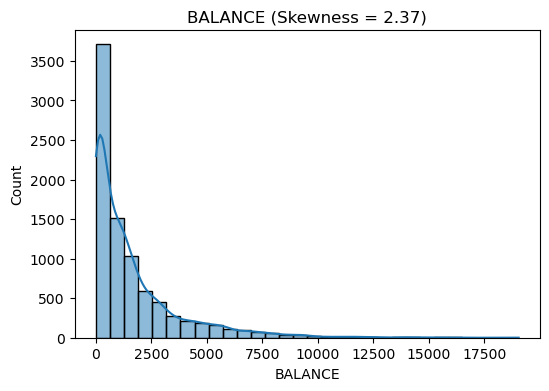

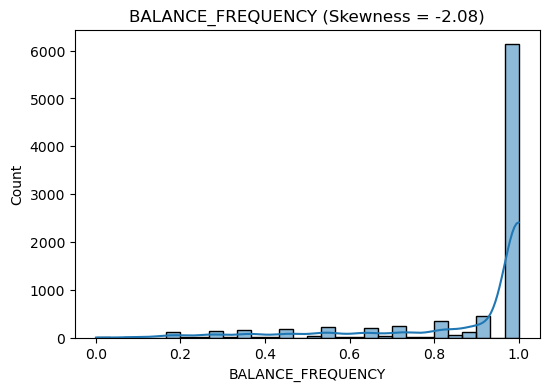

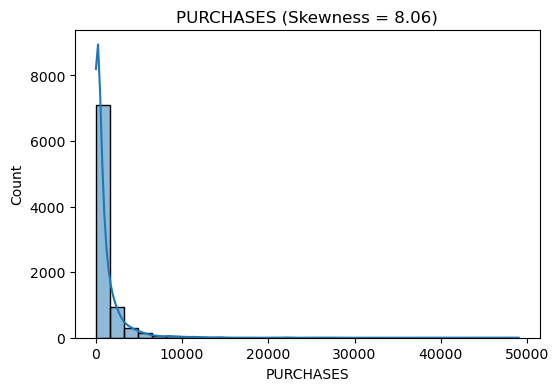

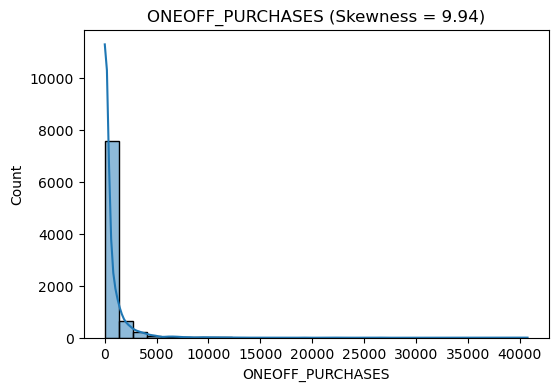

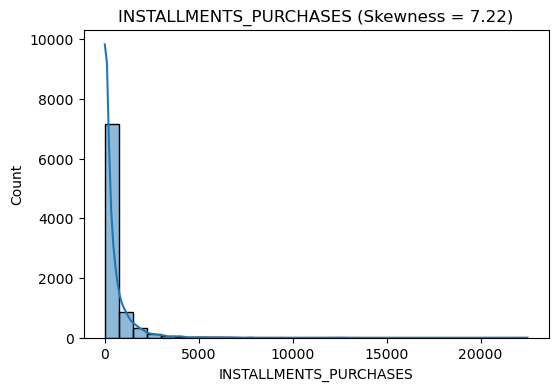

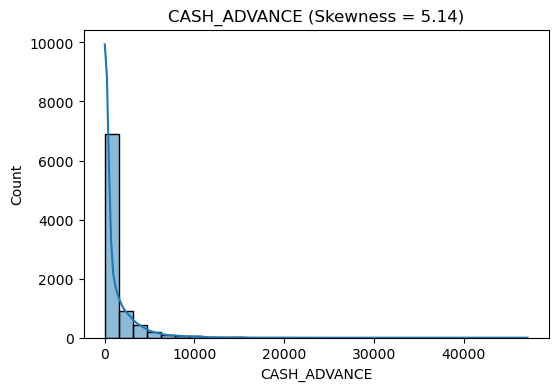

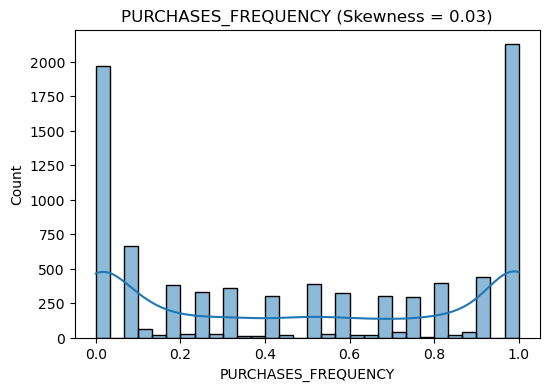

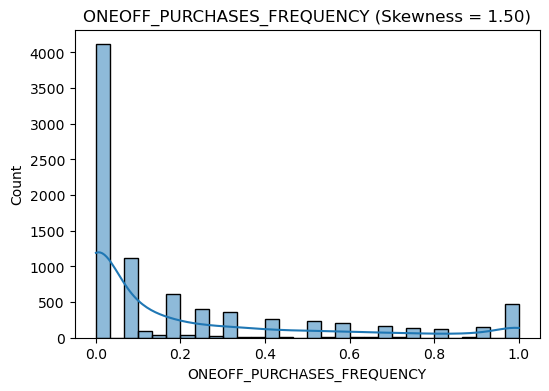

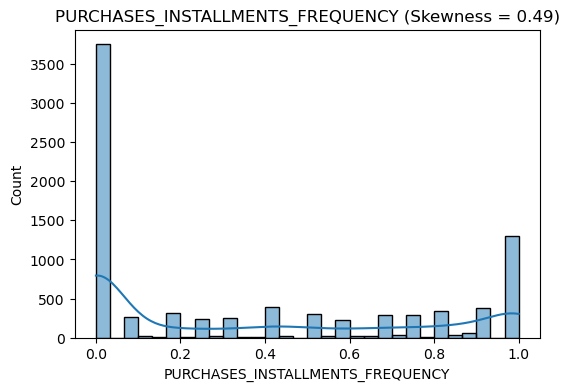

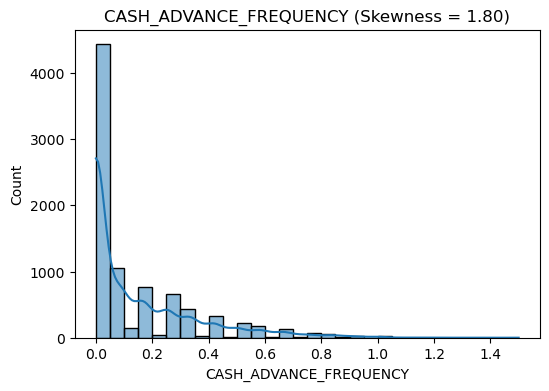

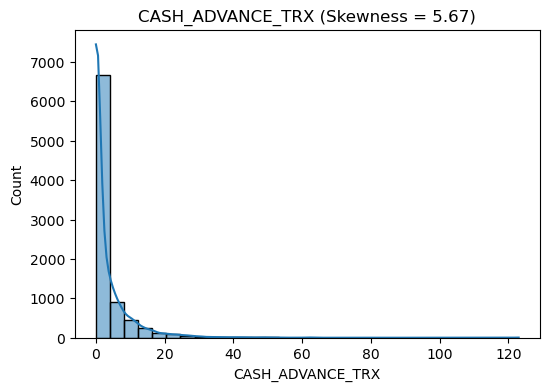

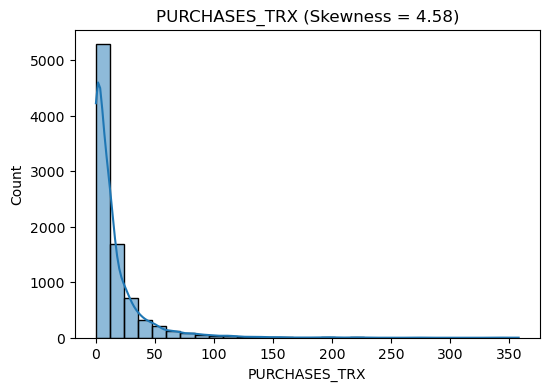

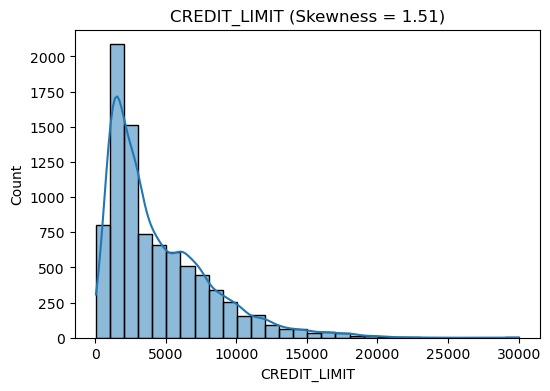

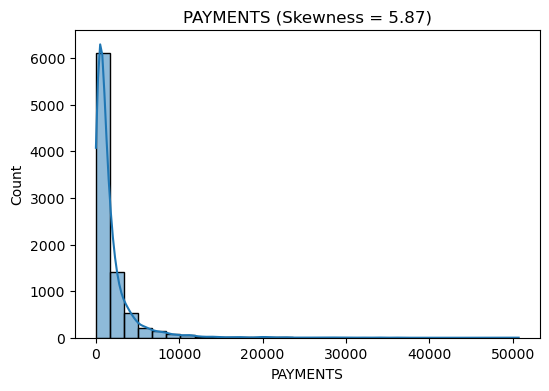

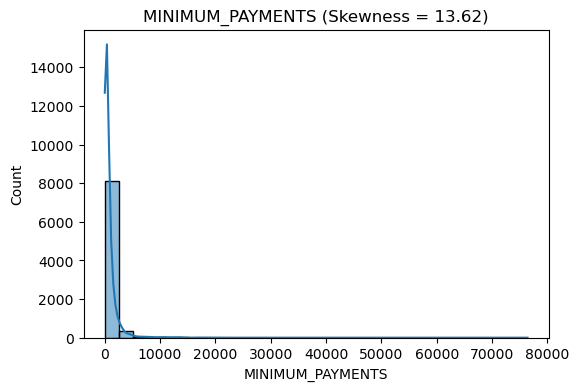

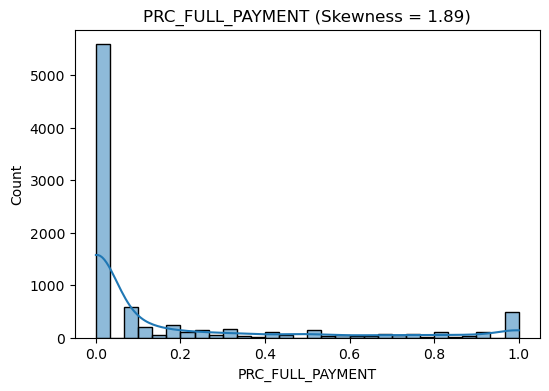

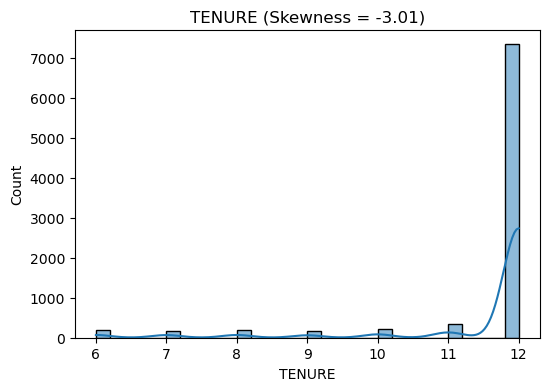

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"{col} (Skewness = {df[col].skew():.2f})")
    plt.show()


In [103]:
for i in df.columns:
  for j in range(3):
    if (df[i].skew()>1):
      df[i]=np.log1p(df[i])
    if (df[i].skew()<-1):
      df[i]=np.log1p(df[i].max()+1-df[i])
  print(f'Skewness of {i}: {df[i].skew()}')

Skewness of BALANCE: -0.7760035358816245
Skewness of BALANCE_FREQUENCY: 1.855895756272743
Skewness of PURCHASES: -0.7776879605982567
Skewness of ONEOFF_PURCHASES: 0.16841964410507407
Skewness of INSTALLMENTS_PURCHASES: -0.042157429213628445
Skewness of CASH_ADVANCE: 0.24816946406308993
Skewness of PURCHASES_FREQUENCY: 0.03304121629361683
Skewness of ONEOFF_PURCHASES_FREQUENCY: 0.9524262536590485
Skewness of PURCHASES_INSTALLMENTS_FREQUENCY: 0.48775295432449595
Skewness of CASH_ADVANCE_FREQUENCY: 1.0362391193044924
Skewness of CASH_ADVANCE_TRX: 0.9206189513008
Skewness of PURCHASES_TRX: 0.009795218627027851
Skewness of CREDIT_LIMIT: -0.10640195517485143
Skewness of PAYMENTS: -0.05035418020356301
Skewness of MINIMUM_PAYMENTS: 0.25152378285721805
Skewness of PRC_FULL_PAYMENT: 1.4405252566587843
Skewness of TENURE: 2.3658307856260365


In [104]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()

pt = PowerTransformer(method='yeo-johnson')
df_transformed = pt.fit_transform(df_numeric)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed)
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
df_scaled=robust_scaler.fit_transform(df_numeric)

pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(df_scaled)

print("Original shape:", df_numeric.shape)
print("Reduced shape after PCA:", X_pca.shape)



Original shape: (8636, 17)
Reduced shape after PCA: (8636, 8)


<Figure size 1400x600 with 0 Axes>

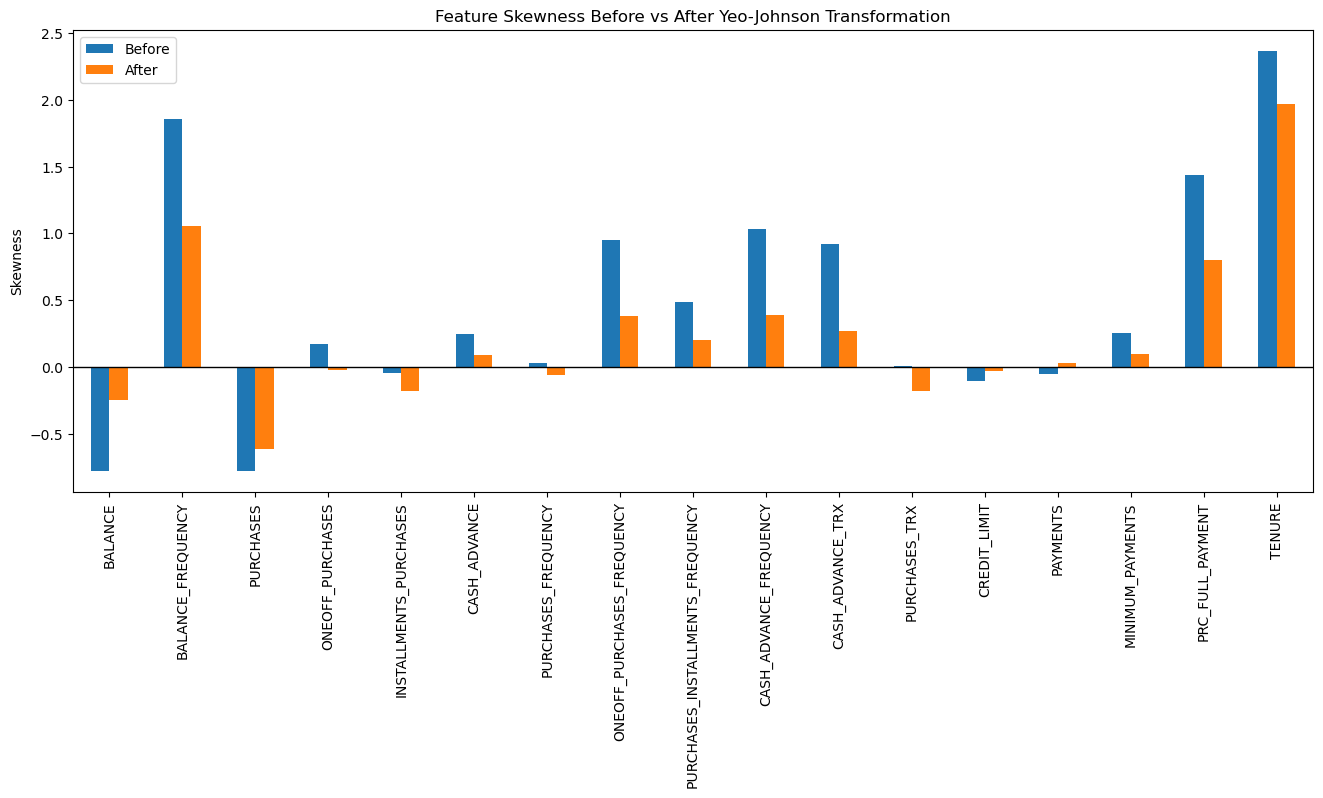

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

skew_before = df_numeric.skew()

df_after = pd.DataFrame(X_scaled, columns=df_numeric.columns)
skew_after = df_after.skew()

skew_df = pd.DataFrame({"Before": skew_before, "After": skew_after})

plt.figure(figsize=(14,6))
skew_df.plot(kind='bar', figsize=(16,6))
plt.axhline(y=0, color='black', linewidth=1)
plt.title("Feature Skewness Before vs After Yeo-Johnson Transformation")
plt.ylabel("Skewness")
plt.show()


In [106]:
skew_after = df_after.skew()
print(skew_after)

BALANCE                            -0.245935
BALANCE_FREQUENCY                   1.057127
PURCHASES                          -0.616724
ONEOFF_PURCHASES                   -0.022886
INSTALLMENTS_PURCHASES             -0.180690
CASH_ADVANCE                        0.089346
PURCHASES_FREQUENCY                -0.058746
ONEOFF_PURCHASES_FREQUENCY          0.378136
PURCHASES_INSTALLMENTS_FREQUENCY    0.203550
CASH_ADVANCE_FREQUENCY              0.389752
CASH_ADVANCE_TRX                    0.265973
PURCHASES_TRX                      -0.178780
CREDIT_LIMIT                       -0.027430
PAYMENTS                            0.028938
MINIMUM_PAYMENTS                    0.097569
PRC_FULL_PAYMENT                    0.797219
TENURE                              1.968061
dtype: float64


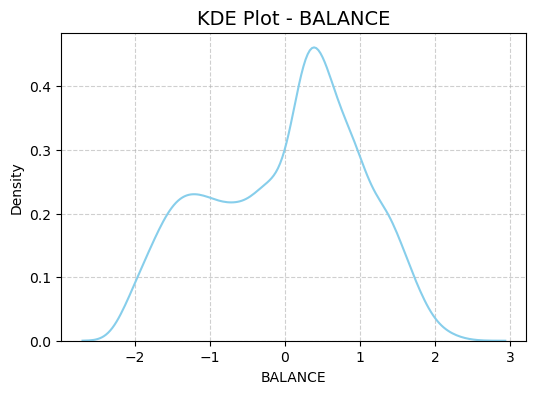

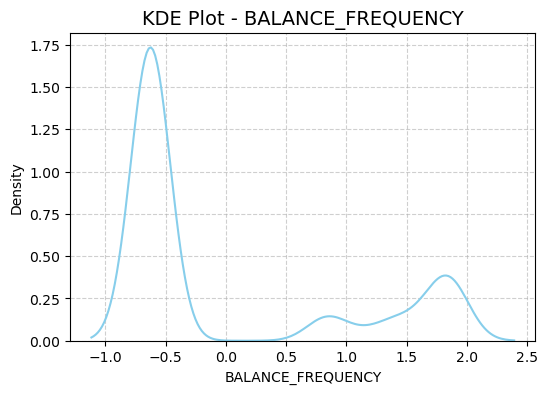

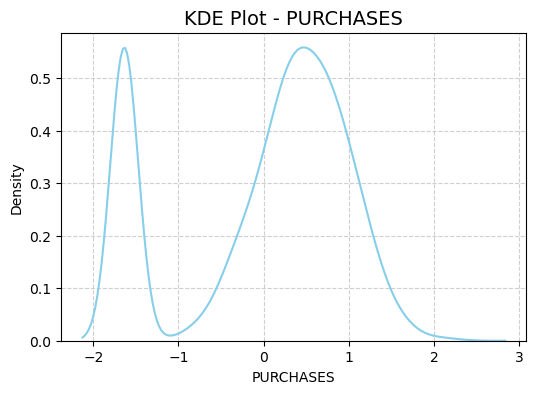

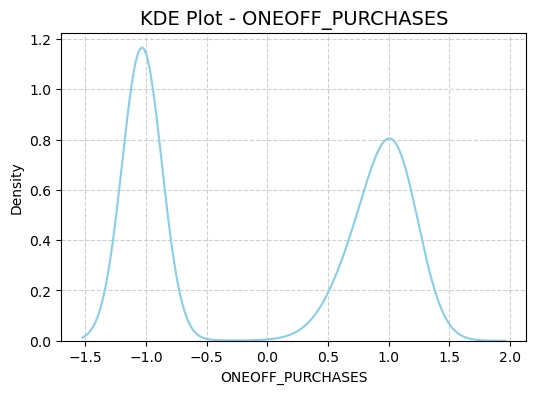

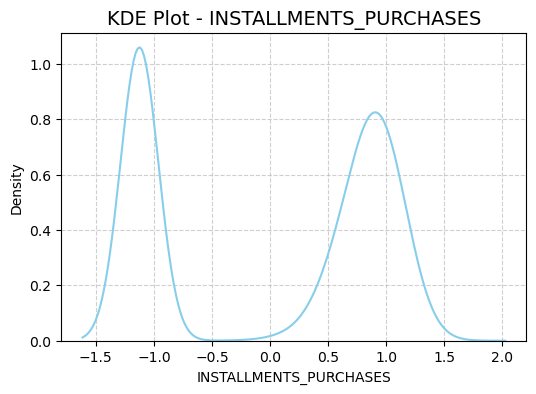

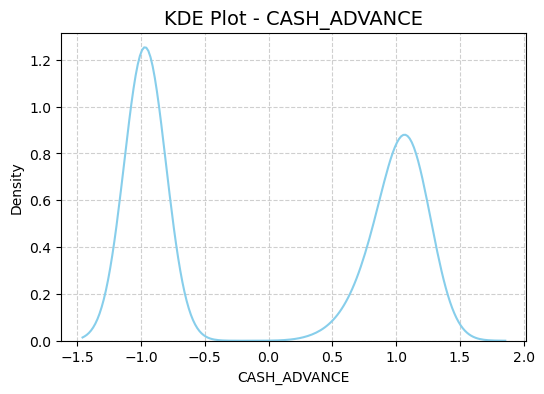

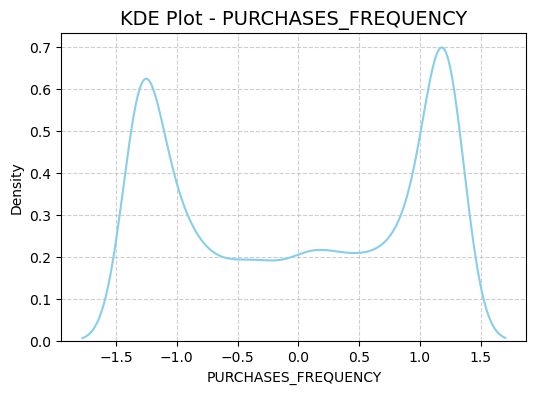

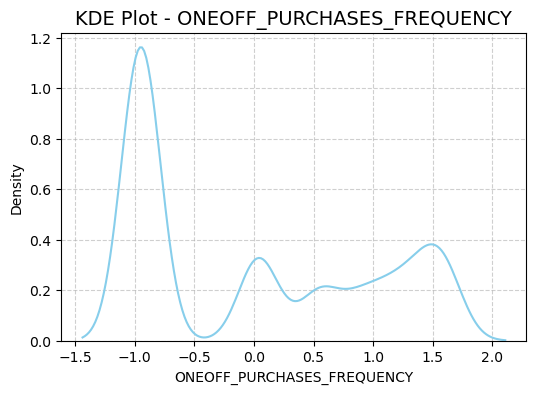

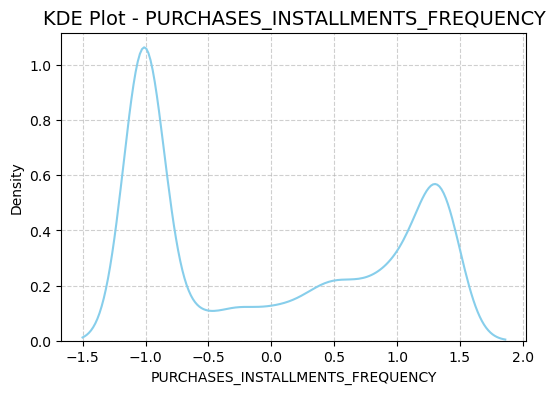

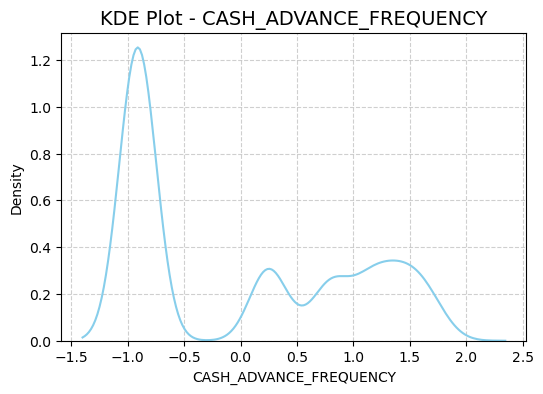

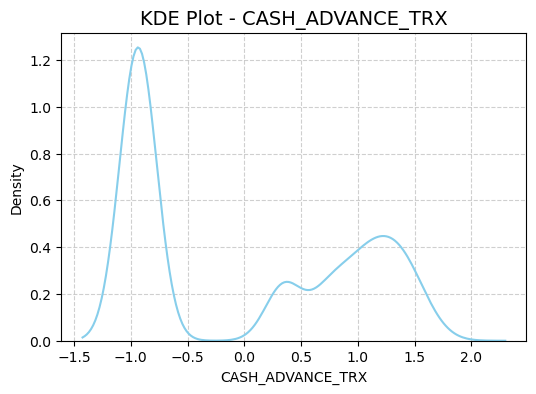

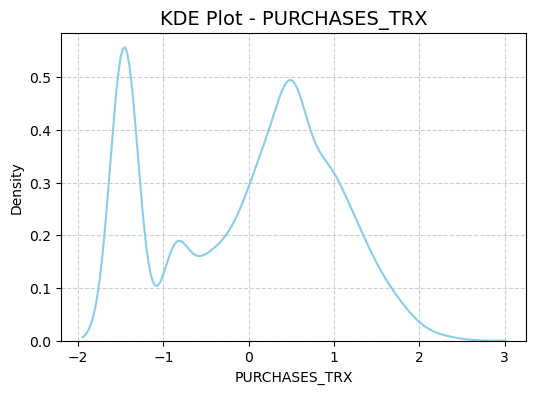

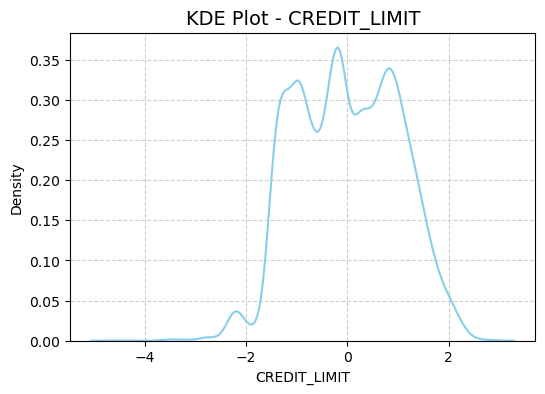

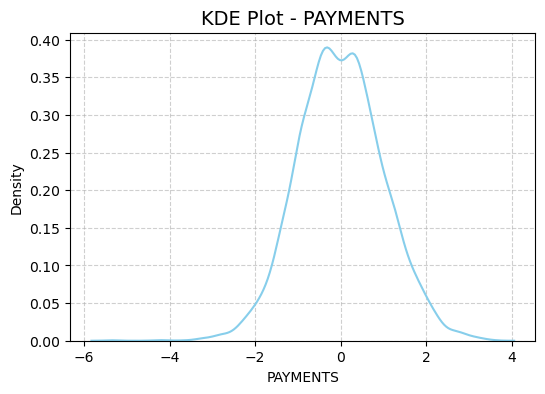

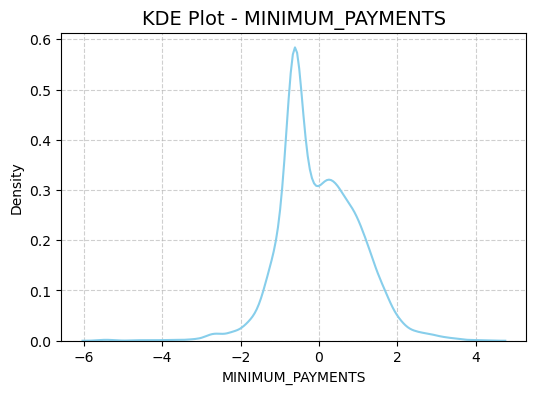

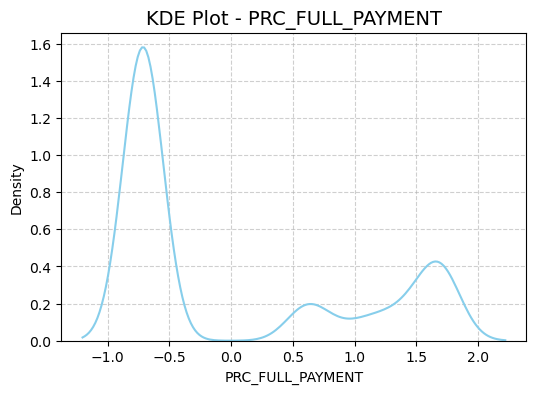

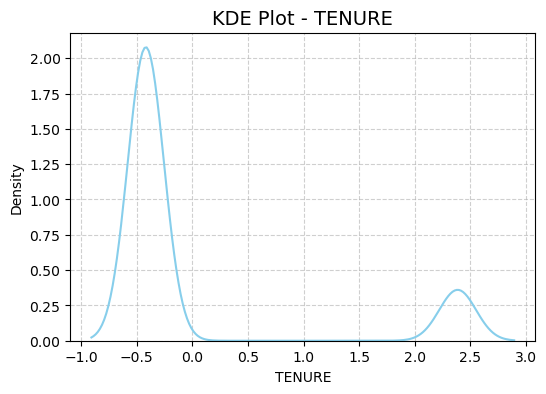

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_after.columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_after[col], color="skyblue")
    plt.title(f"KDE Plot - {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


In [115]:
from sklearn.cluster import KMeans

kmeans = KMeans(
            n_clusters=2, random_state=42, n_init=20     
)

kmeans_labels = kmeans.fit_predict(X_pca)


In [116]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
   eps=2.0, min_samples=5         
)

dbscan_labels = dbscan.fit_predict(X_pca)



In [117]:
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'   
)
agg_labels = agg.fit_predict(X_pca)




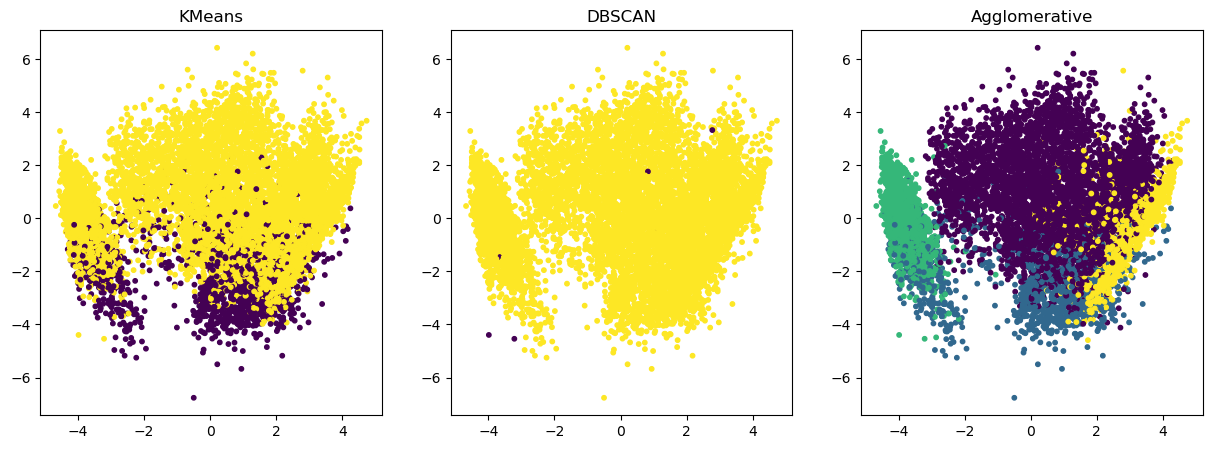

In [118]:

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

models = {
    "KMeans": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "Agglomerative": agg_labels
}

plt.figure(figsize=(15,5))
for i, (name, labels) in enumerate(models.items(), 1):
    plt.subplot(1,3,i)
    plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=labels, cmap="viridis", s=10)
    plt.title(name)
plt.show()


In [119]:
from sklearn.metrics import silhouette_score

print("Silhouette Score (KMeans):", silhouette_score(X_pca, kmeans_labels))
print("Silhouette Score (DBSCAN):", silhouette_score(X_pca, dbscan_labels))
print("Silhouette Score (Agglomerative):", silhouette_score(X_pca, agg_labels))


Silhouette Score (KMeans): 0.4045312239158395
Silhouette Score (DBSCAN): 0.3010215009553022
Silhouette Score (Agglomerative): 0.2658470913702469


In [120]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, Silhouette={score:.3f}")


k=2, Silhouette=0.405
k=3, Silhouette=0.291
k=4, Silhouette=0.291
k=5, Silhouette=0.276
k=6, Silhouette=0.261
k=7, Silhouette=0.242
k=8, Silhouette=0.242
k=9, Silhouette=0.249


In [121]:
for eps in [0.5,0.8, 1.0, 1.5, 2.0]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_pca)
    if len(set(labels)) > 1:
        print(f"eps={eps}, clusters={len(set(labels))}, Silhouette={silhouette_score(X_pca, labels):.3f}") 


eps=0.5, clusters=70, Silhouette=-0.377
eps=0.8, clusters=27, Silhouette=-0.326
eps=1.0, clusters=6, Silhouette=-0.194
eps=1.5, clusters=2, Silhouette=0.273
eps=2.0, clusters=2, Silhouette=0.301
